In [1]:
library(Seurat)
library(tidyverse)
library(patchwork)

Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

Attaching sp

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.5
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
nonNeu.seu <- readRDS('data/non_neuron_named.rds')

In [3]:
plotClsRatio <- function(cls, info, manual_col = F, coltype = "fill", colornum = 8, colortype = "Paired", man_cols = vector()){
  require(RColorBrewer)
  colourCount = length(unique(info))
  getPalette = colorRampPalette(brewer.pal(colornum, colortype))
  dataFrame <- as.data.frame(table(cls, info))
  colnames(dataFrame) <- c("clusters", "Group", "Number")
  
  if(manual_col){
    fill_color <- man_cols
  }else{
    fill_color <- getPalette(colourCount)
  }
  
  ggplot(dataFrame, aes(x = clusters, y = Number, fill = Group)) + 
    geom_col(position = coltype, color = "black") + 
    scale_fill_manual(values = fill_color) + 
    coord_flip() + 
    theme(panel.background = element_blank()
          , axis.text = element_text(face = "bold")
          , axis.text.x = element_text(angle = 45)
    )
}

In [4]:
nonNeu.seu$nuclei <- factor(nonNeu.seu$nuclei
                                , levels = c("PVN", "DMH", "LAH", "VMH", "IN")
                                , labels = c("PVN", "DMH", "LHA", "VMH", "INF"))

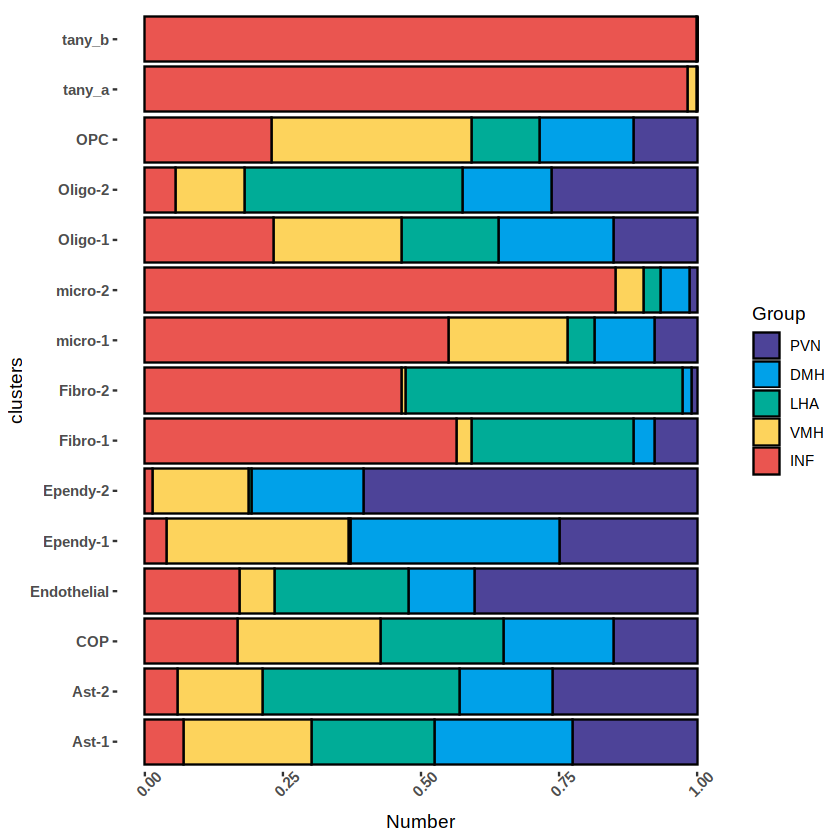

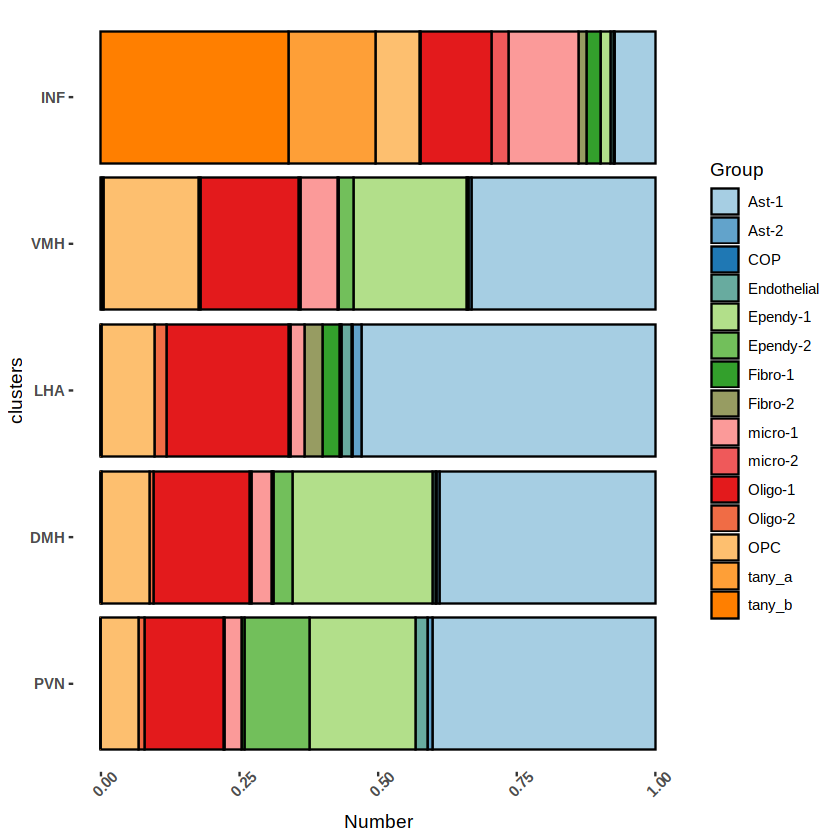

In [7]:
NucName <- c("PVN", "DMH", "LHA", "VMH", "INF")
NucColor <- rev(c("#ea5550", "#fdd35c", "#00ac97", "#00a1e9", "#4d4398"))
names(NucColor) <- NucName

plotClsRatio(nonNeu.seu$sub_type, nonNeu.seu$nuclei, manual_col = T, man_cols = NucColor)
plotClsRatio(nonNeu.seu$nuclei, nonNeu.seu$sub_type)

In [9]:
nonNeu_embedding <- read.csv('non_neuron_data/UMAP_embedding.csv', row.names = 1)

In [13]:
nonNeu_embedding <- as.matrix(nonNeu_embedding)

In [14]:
nonNeu.seu[['UMAP']] <- CreateDimReducObject(nonNeu_embedding, key = "UMAP_", assay = "RNA")

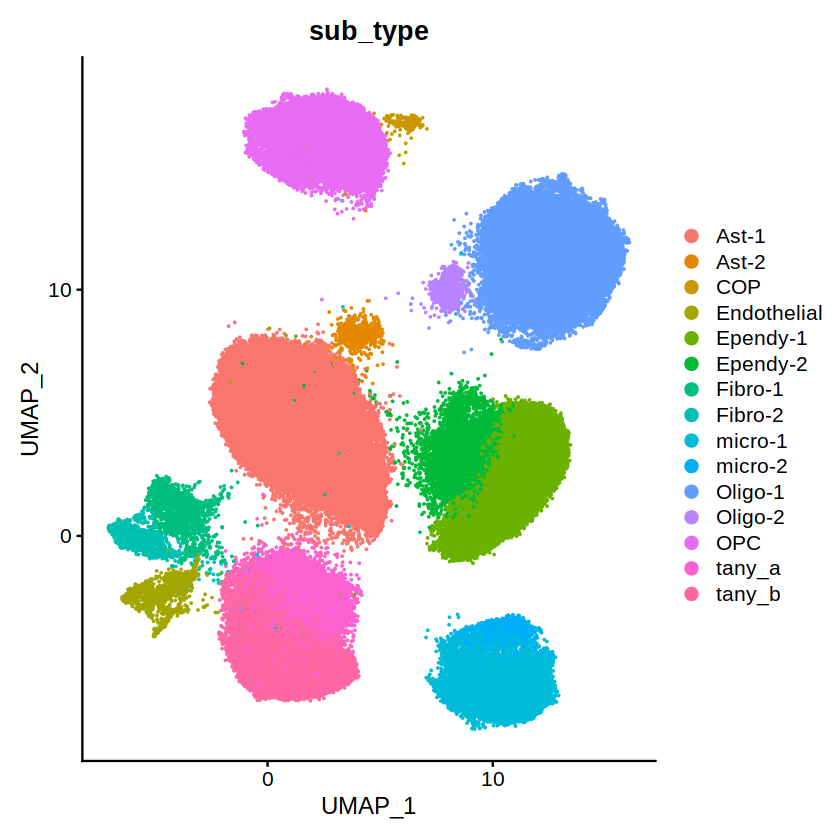

In [16]:
DimPlot(nonNeu.seu, group.by = 'sub_type', raster = F)

In [26]:
nonNeu.seu$ob_deg <- factor(nonNeu.seu$sub_type, levels = c('Ast-1', 'Ast-2'
                                                            , 'COP', 'Endothelial'
                                                            , 'Ependy-1', 'Ependy-2'
                                                            , 'Fibro-1', 'Fibro-2', 'OPC'
                                                            , 'Oligo-1', 'Oligo-2', 'micro-1', 'micro-2'
                                                            , 'tany_a', 'tany_b')
                           , labels = c(5, 4
                                        , 0, 3
                                        , 29, 10
                                        , 28, 39, 3
                                        , 9, 8, 23, 80
                                        , 220, 130)) %>% as.character() %>% as.numeric()

In [32]:
ob_degUMAP <- FeaturePlot(nonNeu.seu, features = "ob_deg", cols = c("#ecf0f1", "#e2041b"), raster = F) + 
  # ggtitle("# of Obesity vs Control DEG") + 
  theme(title = element_blank()
        , axis.line = element_blank()
        , axis.ticks = element_blank()
        , axis.text = element_blank()
        , panel.border = element_rect(color = "black", size = 0.1)
        , plot.title = element_blank())

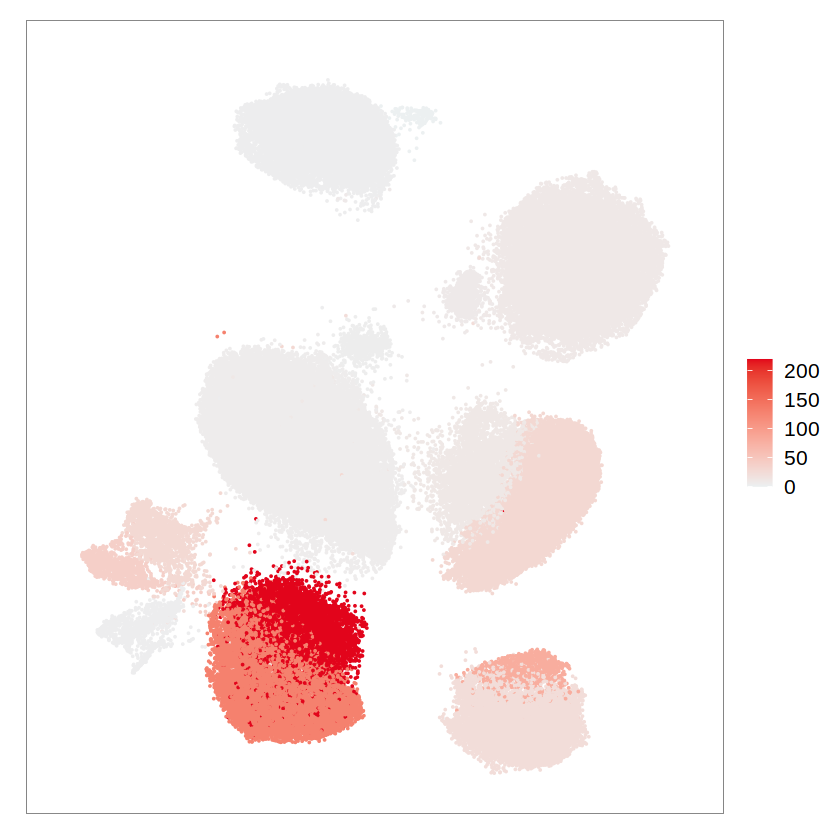

In [33]:
ob_degUMAP

In [36]:
ggsave(filename = 'non_neuron/ob_DEG_UMAP.png', plot = ob_degUMAP, width = 5, height = 4)

In [35]:
nonNeu.seu$db_deg <- factor(nonNeu.seu$sub_type, levels = c('Ast-1', 'Ast-2'
                                                            , 'COP', 'Endothelial'
                                                            , 'Ependy-1', 'Ependy-2'
                                                            , 'Fibro-1', 'Fibro-2', 'OPC'
                                                            , 'Oligo-1', 'Oligo-2', 'micro-1', 'micro-2'
                                                            , 'tany_a', 'tany_b')
                           , labels = c(10, 4
                                        , 0, 33
                                        , 34, 31
                                        , 64, 105, 31
                                        , 12, 4, 79, 395
                                        , 277, 255)) %>% as.character() %>% as.numeric()

db_degUMAP <- FeaturePlot(nonNeu.seu, features = "db_deg", cols = c("#ecf0f1", "#e2041b"), raster = F) + 
  # ggtitle("# of Obesity vs Control DEG") + 
  theme(title = element_blank()
        , axis.line = element_blank()
        , axis.ticks = element_blank()
        , axis.text = element_blank()
        , panel.border = element_rect(color = "black", size = 0.1)
        , plot.title = element_blank())

In [37]:
ggsave(filename = 'non_neuron/db_DEG_UMAP.png', plot = db_degUMAP, width = 5, height = 4)

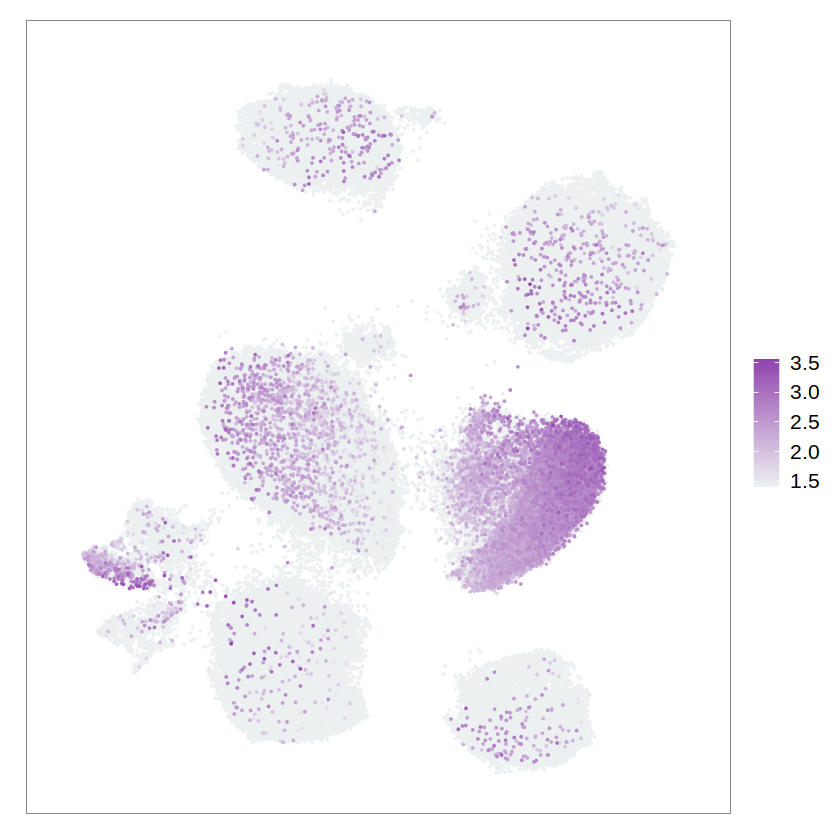

In [45]:
FeaturePlot(nonNeu.seu, features = "NTS", cols = c("#ecf0f1", "#8e44ad"), raster = F, min.cutoff = 'q5', order = T) + 
  # ggtitle("# of Obesity vs Control DEG") + 
  theme(title = element_blank()
        , axis.line = element_blank()
        , axis.ticks = element_blank()
        , axis.text = element_blank()
        , panel.border = element_rect(color = "black", size = 0.1)
        , plot.title = element_blank())
ggsave(filename = 'non_neuron/NTS_umap.png', width = 5, height = 4)

In [49]:
table(nonNeu.seu$cell_type)


      Astrocyte     Endothelial Ependymal cells      Fibroblast       Microglia 
          41489            1247           21827            2887           10286 
Oligodendrocyte             OPC        Tanycyte 
          22654           13646           19466 

# Fibroblast markers

In [46]:
fibro.markers <- FindMarkers(nonNeu.seu, ident.1 = 'Fibro-1', ident.2 = 'Fibro-2', group.by = 'sub_type', only.pos = F, logfc.threshold = 0.3, test.use = 'MAST')


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



In [48]:
write.csv(fibro.markers, 'non_neuron/Fibro_deg.csv')

# Microglia analysis

In [52]:
micro.seu <- subset(nonNeu.seu, cell_type == 'Microglia')

In [53]:
micro.seu

An object of class Seurat 
16283 features across 10286 samples within 1 assay 
Active assay: RNA (16283 features, 0 variable features)
 1 dimensional reduction calculated: UMAP

# Astrocyte